In [1]:
import scanpy as sc
import scanpy_recipe as sr
import pandas as pd

In [2]:
adata = sc.datasets.pbmc3k()
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [3]:
adata = sr.basic_prep(adata,flavor='seurat')
adata

save filtered counts to adata.layers['counts']
AnnData object with n_obs × n_vars = 2698 × 13602
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rp'
    layers: 'counts'


AnnData object with n_obs × n_vars = 2698 × 13602
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'pct_counts_rp', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'rp', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'norm'
    obsp: 'distances', 'connectivities'

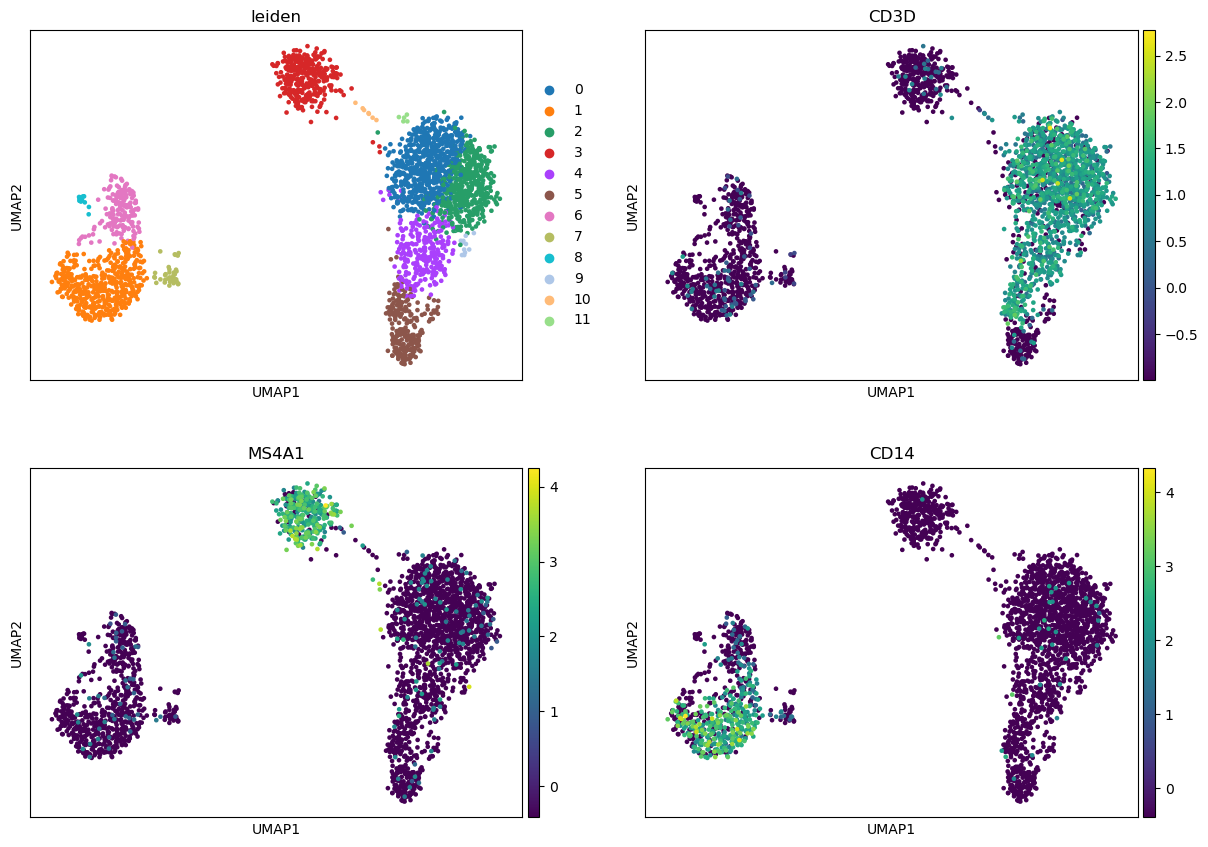

In [5]:
sc.pl.umap(adata,color=['leiden','CD3D','MS4A1','CD14'],ncols=2)

🔬 Input data has 2698 cells and 13602 genes
🔗 Matching reference genes in the model


🧬 4078 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


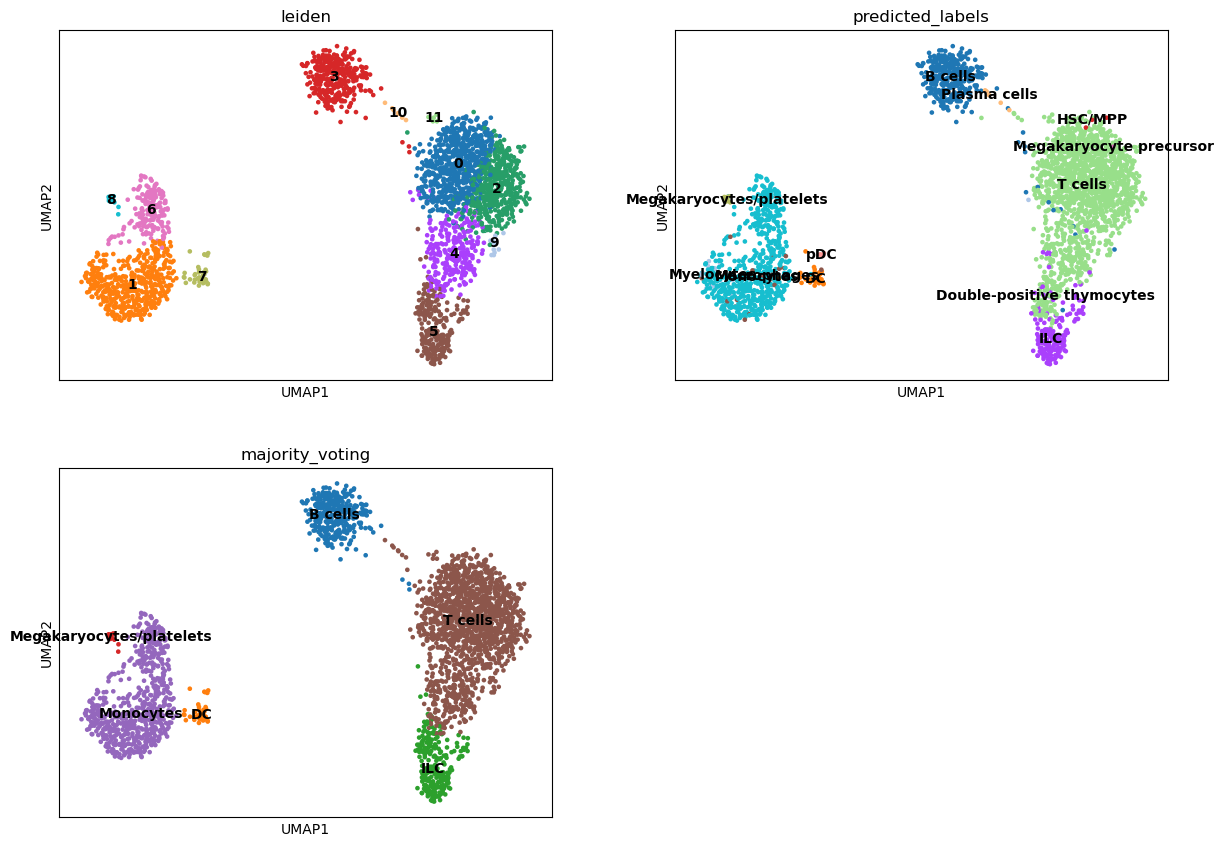

In [7]:
adata.X = adata.layers['norm']
prediction, predicted_ad = sr.run_celltypist(adata,'Immune_All_High.pkl','leiden')